In [4]:
!jupyter nbextension enable --py widgetsnbextension





Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [5]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [6]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


In [25]:
!conda install libomp



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/osx-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https//repo.anaconda.com/pkgs/main/osx-64'




In [1]:
# histogram-based gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# evaluate the model
#model = HistGradientBoostingClassifier()
#model = XGBClassifier()
#model = LGBMClassifier()
model = CatBoostClassifier(verbose=0, n_estimators=100)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f) %.3f' % (mean(n_scores), std(n_scores), max(n_scores)))

# fit the model on the whole dataset
model.fit(X, y)

# make a single prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, 
        -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat)

OSError: dlopen(/opt/anaconda3/envs/test/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /opt/anaconda3/envs/test/lib/python3.7/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [ ]:
## remopving outliers 

# def remove_outlier_IQR(df):
#     Q1=df.quantile(0.01)
#     Q3=df.quantile(0.99)
#     IQR=Q3-Q1
    
#     print(IQR)
#     df_final = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#     return df_final

# df3=remove_outlier_IQR(df)
# print("Number of outliers removed : " , df.shape[0]-df3.shape[0])

In [ ]:
## dendrogram 

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X2, y2 = X_train, y_train 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train2, y_train2)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test2, y_test2)))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), constrained_layout=True)
corr = spearmanr(X2).correlation
print(len(X2))

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=cols.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

# ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
# ax2.set_xticks(dendro_idx)
# ax2.set_yticks(dendro_idx)
# ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
# ax2.set_yticklabels(dendro["ivl"])
# fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.pipeline import make_pipeline, make_union, FeatureUnion
from tpot.builtins import StackingEstimator
#from tpot.export_utils import set_param_recursive
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (VotingClassifier, 
                             StackingClassifier,
                             BaggingClassifier,
                             RandomForestClassifier, 
                             AdaBoostClassifier, 
                             ExtraTreesClassifier, 
                             GradientBoostingClassifier
                             
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#from sklearn.pipeline import FeatureUnion

from sklearn.decomposition import PCA
#from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV




# clf1 = ExtraTreesClassifier(bootstrap=True, 
#                          criterion="gini", 
#                          max_features=0.4, 
#                          min_samples_leaf=5, 
#                          min_samples_split=16, 
#                          n_estimators=100),
    
# clf2 = GradientBoostingClassifier(learning_rate=0.1, 
#                                max_depth=8, 
#                                max_features=0.15000000000000002, 
#                                min_samples_leaf=16, 
#                                min_samples_split=10, 
#                                n_estimators=100, 
#                                subsample=0.25)

# # Average CV score on the training set was: 0.9562374389968795
# exported_pipeline = make_pipeline(
#     StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, 
#                                                      criterion="entropy", 
#                                                      max_features=0.45, 
#                                                      min_samples_leaf=1, 
#                                                      min_samples_split=7, 
#                                                      n_estimators=100)),
#     VotingClassifier(estimators=[
#         ('lr', clf1), ('rf', clf2)], voting='hard')
# )
# # Fix random state for all the steps in exported pipeline
# set_param_recursive(exported_pipeline.steps, 'random_state', 23) 

# Estimator = StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, 
#                                                              criterion="entropy", 
#                                                              max_features=0.45, 
#                                                              min_samples_leaf=1, 
#                                                              min_samples_split=7, 
#                                                              n_estimators=100))

XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, eta=0.4, gamma=0.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.400000006, max_delta_step=0, max_depth=6,
              min_child_weight=1,monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=4,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              #scale_pos_weight=1, 
                    subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None, num_class=1)

ETC = ExtraTreesClassifier(bootstrap=True, 
                             criterion="gini", 
                             max_features=0.4, 
                             min_samples_leaf=5, 
                             min_samples_split=16, 
                             n_estimators=100)


ETC2 = ExtraTreesClassifier(bootstrap=True, 
                             criterion="entropy", 
                             max_features=0.8, 
                             min_samples_leaf=2, 
                             min_samples_split=2, 
                             n_estimators=100)

RFC = RandomForestClassifier(bootstrap=False, 
                             criterion="gini", 
                             max_features=0.25, 
                             min_samples_leaf=1, 
                             min_samples_split=4, 
                             n_estimators=100)


GBC = GradientBoostingClassifier(learning_rate=0.1, 
                               max_depth=8, 
                               max_features=0.15000000000000002, 
                               min_samples_leaf=16, 
                               min_samples_split=10, 
                               n_estimators=100, 
                               subsample=0.25)

SVClf = SVC()
ABC = AdaBoostClassifier()
DTC = DecisionTreeClassifier()
KNC = KNeighborsClassifier()

"""  Transformers. """
Transformers = [
                ('Scaler', RobustScaler()),
                #('kernel_pca', KernelPCA()),
                ('reduce_dim', PCA(.95)),
                # ('KBest', SelectKBest(chi2, k=20).fit_transform(X, y)),
                #('FEATURE', PolynomialFeatures(degree=2,include_bias=False))
]
## Combine transformed features
Transformers = FeatureUnion(Transformers)
"""********************************************"""

""" Estimators """
# Create Base Learners for stacking
base_learners = [
                  ('XGB',XGB), 
                  #('ETC', ETC),
                  #('RFC',RFC), 
                  #('DTC', DTC),
                  #('GBC', GBC),
                  #('SVC', SVC),
                  #('KNC', KNC),
                  #('ABC', ABC),
]
                             ]
# # Initialize Stacking Classifier with the Meta Learner
stack = StackingClassifier(estimators      = base_learners, 
                           final_estimator = LogisticRegression())# ETC
## Voting Classifier
vote = VotingClassifier(estimators = base_learners,
                        voting     ='soft')
## Bagging Classifier
bag = BaggingClassifier(base_estimator =XGB,
                        n_estimators   = 10, 
                        random_state   = 0)
"""****************************************"""

""" Pipeline """
exported_pipeline = make_pipeline(None, vote) ## use * infront of Transformers when not using union.
"""******************************************"""

"""  GRID SEARCH. """
## clf hyper-parameters for gridsearchCV
params = [{'votingclassifier__XGB__learning_rate':    [0.1, 0.01, 0.001, 0.0001],
           'votingclassifier__XGB__min_child_weight': [1,2,3,4],
           'votingclassifier__XGB__subsample':        [0.2, 0.4, 0.6, 0.8]}]

exported_pipeline = GridSearchCV(exported_pipeline,
                     param_grid=params,
                     scoring='accuracy',
                     cv=2,
                     #n_jobs=-1,
                     verbose=10 #needs n_jobs =1
                     )
"""************************************************************"""


""" Train. """
training_features, testing_features, training_target, testing_target = X_train, X_test, y_train, y_test
exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

print("Best Params", exported_pipeline.best_params_)
print("Score", exported_pipeline.score(X_train, y_train))
display(results)

clf = exported_pipeline

In [ ]:
## balanced output
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
## 0.941

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
#roc_auc_score(y_test, clf.decision_function(X_test))

In [ ]:
prob_pos_clf = (clf.predict_proba(X_test)[:, 1] >0.4).astype(int)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prob_pos_clf)
ConfusionMatrixDisplay(cm).plot();  #, display_labels=labels


In [ ]:
## new XGBC from tpot
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

In [ ]:
# get list of defined veriables
%who
%whos # this gives more detail.
%who_ls ## prints only the names as a list
#also
dir()
locals()
globals()


In [ ]:
Estimator = StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=False, 
                                                             criterion="entropy", 
                                                             max_features=0.45, 
                                                             min_samples_leaf=1, 
                                                             min_samples_split=7, 
                                                             n_estimators=100))

XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, eta=0.4, gamma=0.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.400000006, max_delta_step=0, max_depth=6,
              min_child_weight=1,monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=4,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              #scale_pos_weight=1, 
                    subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

ETC = ExtraTreesClassifier(bootstrap=True, 
                         criterion="gini", 
                         max_features=0.4, 
                         min_samples_leaf=5, 
                         min_samples_split=16, 
                         n_estimators=100)

RFC = RandomForestClassifier(bootstrap=False, 
                             criterion="gini", 
                             max_features=0.25, 
                             min_samples_leaf=1, 
                             min_samples_split=4, 
                             n_estimators=100)

DTC = DecisionTreeClassifier()

GBC = GradientBoostingClassifier(learning_rate=0.1, 
                               max_depth=8, 
                               max_features=0.15000000000000002, 
                               min_samples_leaf=16, 
                               min_samples_split=10, 
                               n_estimators=100, 
                               subsample=0.25)
SVC = SVC()




Estimators = VotingClassifier(estimators=[
                                         #('XGB',XGB), 
                                          ('ETC', ETC),
                                         #('RFC',RFC), 
                                         #('DTC', DTC),
                                         #('GBC', GBC),
                                          ('SVC', SVC)
                                     ], 
                                     voting='hard')
# Can not run PolynomialFeatures not enought memory 

from sklearn.decomposition import PCA

Transformers = [
                ('Scaler', RobustScaler()), 
                ('reduce_dim', PCA(.85)),
                #('FEATURE', PolynomialFeatures(degree=2,include_bias=False))
               ]

exported_pipeline = Pipeline(Transformers, Estimators)


In [22]:
# Store variables between sessions
A = "www.fakeurl.com"
%store A
%whos str

%store -r A
print(A)

Stored 'A' (str)
Variable   Type    Data/Info
----------------------------
A          str     www.fakeurl.com
www.fakeurl.com


In [5]:
# Run code from another notebook
%run ../snippets.ipynb ## move up one level to find file.
# this will run all code and display the outputs from the spoecified notebook.

A	 NamespaceMagics	 get_ipython	 getsizeof	 json	 np	 var_dic_list	 
No variables match your requested type.
Stored 'A' (int)
Variable          Type                          Data/Info
---------------------------------------------------------
A                 int                           10
NamespaceMagics   MetaHasTraits                 <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
get_ipython       function                      <function get_ipython at 0x7fcd87f2e200>
getsizeof         builtin_function_or_method    <built-in function getsizeof>
json              module                        <module 'json' from '/opt<...>on3.10/json/__init__.py'>
np                module                        <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
var_dic_list      function                      <function var_dic_list at 0x7fcd89e17490>
10


In [ ]:
## In Jupyter you have to expand variables in a bash-like syntax for them to work in magic functions.

## That's why you will have to use the $ sign. In your case:

import os
to_include = os.path.join('example', 'file.py')
%load $to_include

In [8]:
!export REQUESTS_CA_BUNDLE=/Users/dominic.mckean/Documents/certificate.pem

In [ ]:
## bypass ssl certificates. 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

code below is imported via %load {URL}

In [ ]:
%load "https://gist.githubusercontent.com/zluvsand/74a6d88e401c4e3f76c2ae783a18689b/raw/5c9fd80a7bed839ba555bf4636e47572bd5c7e6d/pickle.py"

This is the output from the above %load code.

In [ ]:
# %load "https://gist.githubusercontent.com/zluvsand/74a6d88e401c4e3f76c2ae783a18689b/raw/5c9fd80a7bed839ba555bf4636e47572bd5c7e6d/pickle.py"
import pickle 

# Write pickle
with open('categorical.pkl', 'wb') as pickle_file:
    pickle.dump(categorical, pickle_file)

# Load pickle    
with open('categorical.pkl', 'rb') as pickle_file:
    categorical = pickle.load(pickle_file)

In [16]:
!pwd

/Users/dominic.mckean/Library/CloudStorage/OneDrive-SecureEngineering/notebooks


Write a snippet file

In [17]:
%%writefile setup.py
# Data manipulation
import numpy as np
import pandas as pd
pd.options.display.max_columns=None
pd.options.display.float_format='{:.2f}'.format
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk', palette='rainbow')


Writing setup.py


Load snippets using %load 

In [ ]:
# %load setup.py

# Data manipulation
import numpy as np
import pandas as pd
pd.options.display.max_columns=None
pd.options.display.float_format='{:.2f}'.format
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk', palette='rainbow')


What the hell did I just do?

In [19]:
%history -n

   1:
# Store variables between sessions
A = 10
%store A
   2:
# Store variables between sessions
A = 10
%store A

%store -r A
print(A)
   3:
# Store variables between sessions
A = 10
%store A
%whos
%store -r A
print(A)
   4:
# Run code from another notebook
%run ../snippets.ipynb
# this will run all code and display the outputs from the spoecified notebook.
   5:
# Run code from another notebook
%run snippets.ipynb
# this will run all code and display the outputs from the spoecified notebook.
   6: %load https://gist.githubusercontent.com/zluvsand/74a6d88e401c4e3f76c2ae783a18689b/raw/5c9fd80a7bed839ba555bf4636e47572bd5c7e6d/pickle.py
   7:
!export REQUESTS_CA_BUNDLE=/Users/dominic.mckean/Documents/certificate.pem
%load https://gist.githubusercontent.com/zluvsand/74a6d88e401c4e3f76c2ae783a18689b/raw/5c9fd80a7bed839ba555bf4636e47572bd5c7e6d/pickle.py
   8: !export REQUESTS_CA_BUNDLE=/Users/dominic.mckean/Documents/certificate.pem
   9: %load https://gist.githubusercontent.com/zluvsand/7

In [28]:
import pandas as pd
df = pd.DataFrame({'A': [1, 1, 2, 2],
                   'B': [1, 2, 3, 4],
                   'C': np.random.randn(4)})
display(df)
display(df.groupby('A').agg(['min', 'max']))
df.groupby('A').agg({'B': ['min', 'max', 'sum', 'mean'], 'C': 'sum'})

,A,B,C
0,1,1,1.713192
1,1,2,2.284104
2,2,3,-0.119250
3,2,4,0.194030


B             C          
  min max       min       max
A                            
1   1   2  1.713192  2.284104
2   3   4 -0.119250  0.194030

B                      C
  min max sum mean       sum
A                           
1   1   2   3  1.5  3.997296
2   3   4   7  3.5  0.074780

In [30]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [32]:
df.loc[df.AAA >= 5, ["BBB", "CCC"]] = 555
df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [34]:
df["logic"] = np.where(df["AAA"] > 5, "high", "low")
df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,555,555,low
2,6,555,555,high
3,7,555,555,high


In [67]:
df2 = df
display(df2)

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,555,555,low
2,6,555,555,high
3,7,555,555,high


In [69]:
df2.drop('AAA', axis=1)

,BBB,CCC,logic
0,10,100,low
1,555,555,low
2,555,555,high
3,555,555,high


In [71]:
df2

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,555,555,low
2,6,555,555,high
3,7,555,555,high


In [50]:
!ls

Diabetes-Data  SampleCode     setup.py       snippets.ipynb


In [65]:
data = pd.read_csv('Diabetes-Data/data-02', sep='\t', header=None)
print(data)

              0      1   2    3
0    10-10-1989  08:00  58  149
1    10-10-1989  08:00  33  010
2    10-10-1989  12:00  60  116
3    10-10-1989  12:00  33  004
4    10-10-1989  18:00  62  304
..          ...    ...  ..  ...
756  01-12-1990  22:00  33  016
757  01-13-1990  08:00  58  272
758  01-13-1990  08:00  33  012
759  01-13-1990  12:00  60  388
760  01-13-1990  12:00  33  006

[761 rows x 4 columns]


In [66]:
data = pd.DataFrame(data)
glimpse(data)

NameError: name 'glimpse' is not defined

In [67]:
np.random.get_state()

('MT19937',
 array([  71701544, 1072346566, 2121661234,  918365634, 3928473398,
        1850182892,  905803554,  757271419, 3101973818, 2649159101,
        1725950760, 2502848454,  807244764,  833351479, 2926736477,
        2221854113, 4280449964, 2155183950, 1379616348, 3984695742,
        2995064547,  291356513,  743016737, 3171804309, 3886992455,
        2548021011, 2471562374, 3357349941,  614792274, 1390113488,
        4193772143, 2394391791, 2983600632, 3383975624, 1549001603,
        3467065487, 2574303137, 3107076302, 2737263544, 2946753915,
         517231690, 2261228235, 2076393507, 4026625982, 4144995726,
        3588345853, 1143727635, 1104976964, 3899415157,  163537412,
        2745216976,  201930166, 1906073453, 2379461487, 3796313016,
          60929209, 3242765622,    2719077, 3046594263, 3599623717,
        2151402381, 2280900015, 3450230526, 2061034496, 1630952463,
        1791677670, 3251886787, 4117564178, 3661480827, 4293161295,
        3856137823, 2931348535,  935

In [72]:
!pip install facets-overview

Looking in indexes: https://nexus.nonprod.dwpcloud.uk/repository/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.0/484.0 kB 597.1 kB/s eta 0:00:0000:0100:01


In [4]:
arr = np.arange(9).reshape((3, 3))
np.random.permutation(arr)

array([[3, 4, 5],
       [0, 1, 2],
       [6, 7, 8]])

In [9]:
from sklearn import linear_model

In [10]:
linear_model.ElasticNet?

In [11]:
!pip install xgboost


Looking in indexes: https://nexus.nonprod.dwpcloud.uk/repository/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 561.8 kB/s eta 0:00:0000:0100:01


In [26]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#import libraries
import pandas as pd
import numpy as np 
from sklearn.ensemble import StackingClassifier, VotingClassifier , RandomForestClassifier
from sklearn.metrics import f1_score


from sklearn.datasets import fetch_openml


#import dataset
titanic = fetch_openml('titanic', version=1, as_frame=True)
df = titanic['data']
df['survived'] = titanic['target']
X = df.drop('survived',axis=1)
y = df['survived']

data = pd.DataFrame(df)
display(data)

#train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#data cleaning and prep

def data_clean(df):
    df = df.drop(['name','ticket','cabin'],axis=1)  #drop unnecessary columns
    for col in df.select_dtypes(include=['number']):   #replace missing value with column mean
        df[col].fillna(df[col].mean(),inplace=True) 
    for col in df.select_dtypes(include=['object']):
        df[col].fillna(df[col].value_counts().index[0], inplace=True)  #replace missing value with column mode
    return df

X_train = data_clean(X_train)   
X_test = data_clean(X_test)

#data encoding
from sklearn.preprocessing import LabelEncoder
def data_encode(df):
    le_sex = LabelEncoder()
    le_embk = LabelEncoder()

    df.sex = le_sex.fit_transform(df.sex)
    df.embarked = le_embk.fit_transform(df.embarked)

    return df, le_sex, le_embk
X_train, le_sex, le_embk = data_encode(X_train)

def test_encode(df, le_sex, le_embk):

    df.sex = le_sex.transform(df.sex)
    df.embarked = le_embk.transform(df.embarked)
    return df

X_test = test_encode(X_test, le_sex, le_embk)

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_predict_lr = lr.predict(X_test)
score_lr = f1_score(y_test,y_predict_lr)

print('The score using Logistic Regression is {}'.format(score_lr))

#Nearest Neigbour
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_predict_knn = knn.predict(X_test)
score_knn = f1_score(y_test,y_predict_knn)

print('The score using K Nearest Neigbours is {}'.format(score_knn))


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None,0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None,0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None,0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None,0


ValueError: could not convert string to float: 'D'

In [31]:
!export REQUESTS_CA_BUNDLE=/Users/dominic.mckean/Documents/certificate.pem
!pip install imblearn


Looking in indexes: https://nexus.nonprod.dwpcloud.uk/repository/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 278.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 380.6 kB/s eta 0:00:00a 0:00:01


In [34]:
!pip3 install torch torchvision



Looking in indexes: https://nexus.nonprod.dwpcloud.uk/repository/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 MB 1.5 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.2 MB/s eta 0:00:0000:0100:01


In [40]:
import torch
x = torch.rand(7, 5, 3, 2)
print(x.shape)
print(x)

torch.Size([7, 5, 3, 2])
tensor([[[[0.1614, 0.5736],
          [0.8854, 0.1298],
          [0.8844, 0.7234]],

         [[0.9433, 0.6956],
          [0.4593, 0.0716],
          [0.5729, 0.0717]],

         [[0.1251, 0.2693],
          [0.4546, 0.4478],
          [0.5538, 0.2103]],

         [[0.3669, 0.3839],
          [0.7246, 0.6143],
          [0.7492, 0.8674]],

         [[0.5207, 0.4959],
          [0.5406, 0.0725],
          [0.3991, 0.5128]]],


        [[[0.6820, 0.7833],
          [0.8283, 0.4287],
          [0.6263, 0.6227]],

         [[0.1124, 0.0047],
          [0.5275, 0.7851],
          [0.4294, 0.7187]],

         [[0.6545, 0.7786],
          [0.6302, 0.7228],
          [0.4855, 0.8189]],

         [[0.2716, 0.1792],
          [0.0511, 0.2016],
          [0.0832, 0.9649]],

         [[0.6301, 0.3302],
          [0.6274, 0.7299],
          [0.1099, 0.9487]]],


        [[[0.1993, 0.7573],
          [0.0179, 0.0891],
          [0.4513, 0.6652]],

         [[0.4344, 0.6907

In [65]:
datasets

<module 'sklearn.datasets' from '/opt/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/datasets/__init__.py'>

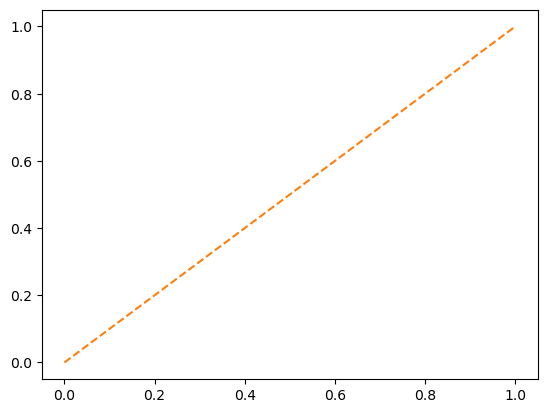

In [63]:
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', label='perfectly calibrated')
plt.show()

In [85]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

In [95]:
display(survey.data)

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8.0,no,female,21.0,not_member,35.0,Hispanic,Other,Manufacturing,Married
1,9.0,no,female,42.0,not_member,57.0,White,Other,Manufacturing,Married
2,12.0,no,male,1.0,not_member,19.0,White,Other,Manufacturing,Unmarried
3,12.0,no,male,4.0,not_member,22.0,White,Other,Other,Unmarried
4,12.0,no,male,17.0,not_member,35.0,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...
529,18.0,no,male,5.0,not_member,29.0,White,Professional,Other,Unmarried
530,12.0,no,female,33.0,not_member,51.0,Other,Professional,Other,Married
531,17.0,no,female,25.0,member,48.0,Other,Professional,Other,Married
532,12.0,yes,male,13.0,member,31.0,White,Professional,Other,Married


In [91]:
X = survey.data[survey.feature_names]
X.describe(include="all")

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


In [96]:
y = survey.target.values.ravel()
survey.target.head()

0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

Mean=50.020, Standard Deviation=5.055


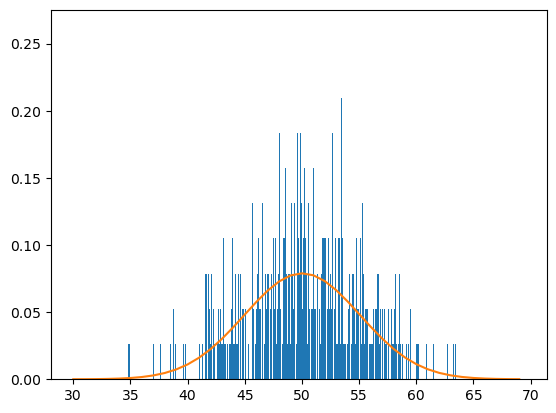

In [124]:
# example of parametric probability density estimation
from matplotlib import pyplot
from numpy.random import normal
from numpy import mean
from numpy import std
from scipy.stats import norm
# generate a sample
sample = normal(loc=50, scale=5, size=10000)
# calculate parameters
sample_mean = mean(sample)
sample_std = std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
# define the distribution
dist = norm(sample_mean, sample_std)
# sample probabilities for a range of outcomes
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
# plot the histogram and pdf
pyplot.hist(sample, bins=10000, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

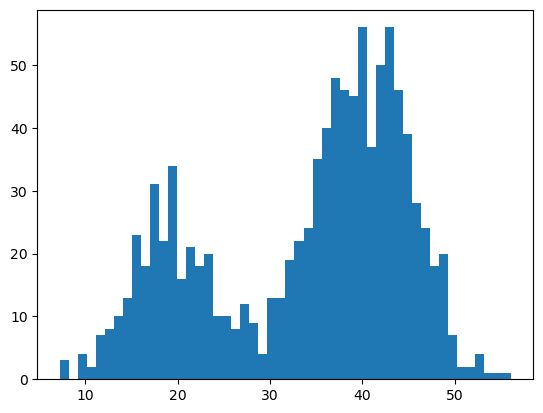

In [125]:
# example of a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# plot the histogram
pyplot.hist(sample, bins=50)
pyplot.show()

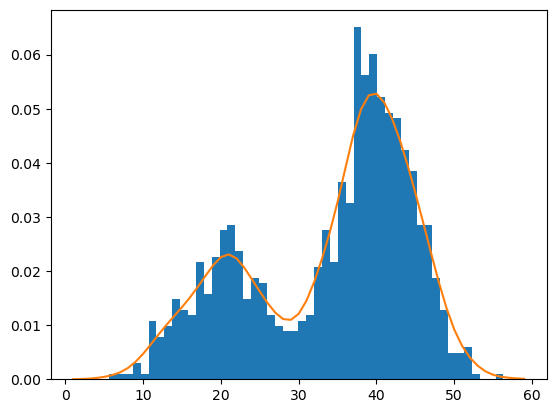

In [126]:
# example of kernel density estimation for a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# fit density
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()